In [1]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.preprocessing as pre
import sklearn.metrics as met
import sklearn.naive_bayes as nb
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
data = pd.read_csv("datasets/titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
# data.isnull().sum()
# data.drop(["sex", "class", "adult_male", "deck", "embark_town", "alive"], axis= 1, inplace=True)

# data["age"].loc[(data["who"] == 0)].mean() # 6.369
# data["age"].loc[(data["who"] == 1)].mean() # 33.173
# data["age"].loc[(data["who"] == 2)].mean() # 32.0

# data["age"].loc[(data["who"] == 1) & (data["age"].isnull() == True)] = 33.173
# data["age"].loc[(data["who"] == 2) & (data["age"].isnull() == True)] = 32

C:\Users\User\AppData\Local\Temp\ipykernel_3008\578679538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"].loc[(data["who"] == 1) & (data["age"].isnull() == True)] = 33.173
C:\Users\User\AppData\Local\Temp\ipykernel_3008\578679538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"].loc[(data["who"] == 2) & (data["age"].isnull() == True)] = 32


In [9]:
who = pre.LabelEncoder()
who.fit(data["who"])
data["who"] = who.transform(data["who"])

alone = pre.LabelEncoder()
alone.fit(data["alone"])
data["alone"] = alone.transform(data["alone"])

embarked = pre.LabelEncoder()
embarked.fit(data["embarked"])
data["embarked"] = embarked.transform(data["embarked"])

# MEMERIKSA LABEL TIAP CLASS

In [10]:
# who.classes_

In [11]:
data = data.astype("int")

# MENINGKATKAN KINERJA MODEL

<AxesSubplot:>

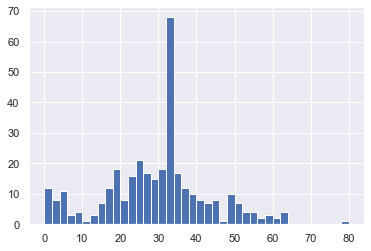

In [12]:
data["age"].loc[data["survived"] == 1].hist(bins=40)

In [13]:
umur = [0, 5, 15, 25, 35, 45, 55, 60, 100]
umur_label = ["0-5", "5-15", "15-25", "25-35", "35-45", "45-55", "55-60", ">60"]
kelompok_umur = pd.cut(data["age"], umur, labels=umur_label)
# data["kelompok_umur"] = kelompok_umur
data["kel_umur_code"] = data["kelompok_umur"].cat.codes
# data["kelompok_umur"].hist(bins=20);

KeyError: 'kelompok_umur'

In [ ]:
# Menggabungkan Jum Orang sibsp dgn parch

jum_orang = data["sibsp"] + data["parch"] + 1
data["jumlah_orang"] = jum_orang
data

In [ ]:
# data.drop(["kelompok_umur"], axis=1, inplace=True)
X = data.iloc[:, 1:]
y = data["survived"]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
model = nb.GaussianNB()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
acc = met.accuracy_score(y_test, y_pred)
prec = met.precision_score(y_test, y_pred)
print(f"Akurasi = {acc} \nPrecision = {prec}")

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, color="red", label="AUC %s" %(auc))
plt.legend(loc=4)
plt.show()

# MENGGUNAKAN METODE LOGISTIK REGRESI

In [ ]:
data2 = data.copy()
data2

In [ ]:
X = data2.iloc[:, 1:]
y = data2["survived"]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
model = lm.LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
acc = met.accuracy_score(y_test, y_pred)
prec = met.precision_score(y_test, y_pred)
print(f"Akurasi = {acc} \nPrecision = {prec}")

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::, 1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, label="data 1, auc = {%s}" %(str(auc)))
plt.legend(loc=4)
plt.show()

In [16]:
data.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64